# ANÁLISE DE DADOS DE ALUGUÉIS DE BICICLETAS

**Objetivo:**
O projeto teve como objetivo analisar dados históricos de aluguéis de bicicletas, identificar padrões sazonais e temporais, e prever a demanda futura. A análise envolveu tratamento de dados, visualizações estatísticas e aplicação de modelos preditivos.

Ferramentas e Tecnologias Utilizadas:

**Linguagem:**

*   Python



**Bibliotecas:**

*   Pandas
*   Numpy
*   Matplotlib
*   Seaborn
*   Prophet



**Processos**: Limpeza e transformação de dados, visualização gráfica e modelagem de séries temporais





**Etapas do Projeto**
**Exploração da Base de Dados:** Entendimento das variáveis (ex: temperatura, umidade, datas e contagem de aluguéis).






**Criação de Novas Variáveis:** Estação do ano, feriado, fim de semana e dia da semana para segmentar o comportamento dos usuários.





**Visualização de Dados:** Análise de padrões mensais, semanais e por condições climáticas.




**Tratamento de Outliers:** Remoção de valores atípicos para melhorar a qualidade dos dados.





**Previsão com Prophet:** Aplicação do modelo para prever o número de aluguéis futuros e decompor os principais componentes da série temporal (tendência e sazonalidades).







## IMPORTANDO DADOS

In [77]:
import pandas as pd

In [78]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data_science_projeto/main/Dados/bicicletas.csv')
dados.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


## 1.0 TRATANDO DADOS NULOS##

In [79]:
dados.shape


(17429, 10)

In [80]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


Verificando os valores nulos

In [81]:
dados.isnull().sum()

,0
data_hora,0
contagem,0
temperatura,23
sensacao_termica,23
umidade,0
velocidade_vento,0
clima,0
feriado,0
fim_de_semana,0
estacao,0


In [82]:
dados['temperatura'] = dados['temperatura'].interpolate(method='linear')
dados['sensacao_termica'] = dados['sensacao_termica'].interpolate(method='linear')
dados.head(10)

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno
5,2015-01-04 05:00:00,46,2.00,2.00,93.0,4.0,Céu limpo,Não,Sim,Inverno
6,2015-01-04 06:00:00,51,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
7,2015-01-04 07:00:00,75,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
8,2015-01-04 08:00:00,131,1.50,-1.00,96.5,8.0,Parcialmente nublado,Não,Sim,Inverno
9,2015-01-04 09:00:00,301,2.00,-0.50,100.0,9.0,Nublado,Não,Sim,Inverno


In [83]:
dados.isnull().sum()

,0
data_hora,0
contagem,0
temperatura,0
sensacao_termica,0
umidade,0
velocidade_vento,0
clima,0
feriado,0
fim_de_semana,0
estacao,0


In [84]:
dados.duplicated().sum()

np.int64(15)

In [85]:
duplicatas = dados.duplicated(keep=False)
linhas_duplicadas = dados[duplicatas]
linhas_duplicadas.sort_values(by=['data_hora'])

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
17421,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
17418,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


## 1.2 Explorando os dados númericos

In [86]:
dados_limpo = dados.drop_duplicates()
dados_limpo.shape

(17414, 10)

In [87]:
dados_limpo.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


## 1.3 VISUALIZAÇÃO

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

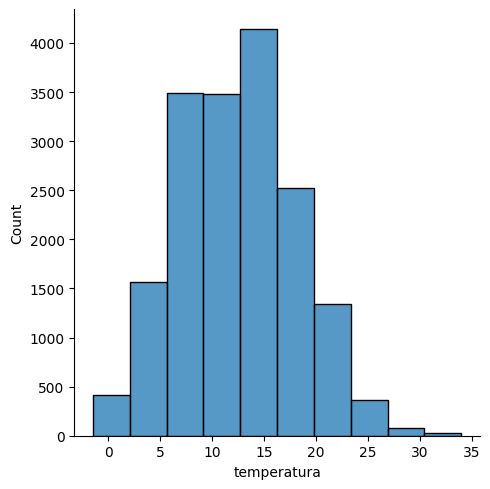

In [89]:
sns.displot(dados_limpo, x='temperatura',bins=10)
plt.show()

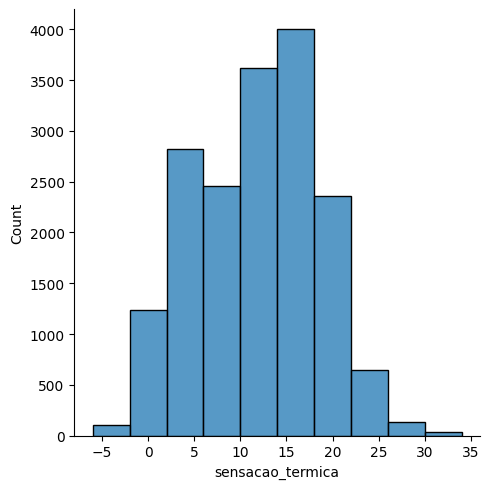

In [90]:
sns.displot(dados_limpo, x='sensacao_termica',bins=10)
plt.show()

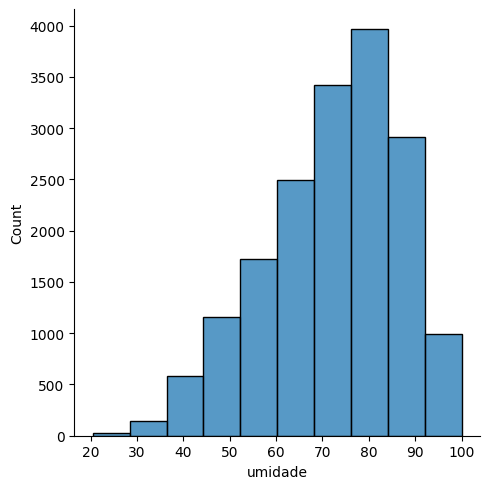

In [91]:
sns.displot(dados_limpo, x='umidade',bins=10)
plt.show()

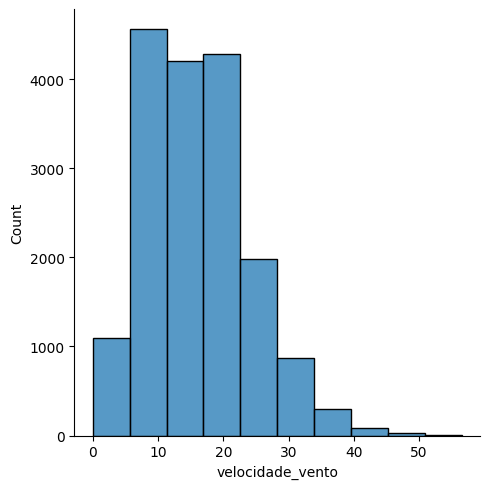

In [92]:
sns.displot(dados_limpo, x='velocidade_vento',bins=10)
plt.show()

## 1.4 Correlação entre os dados

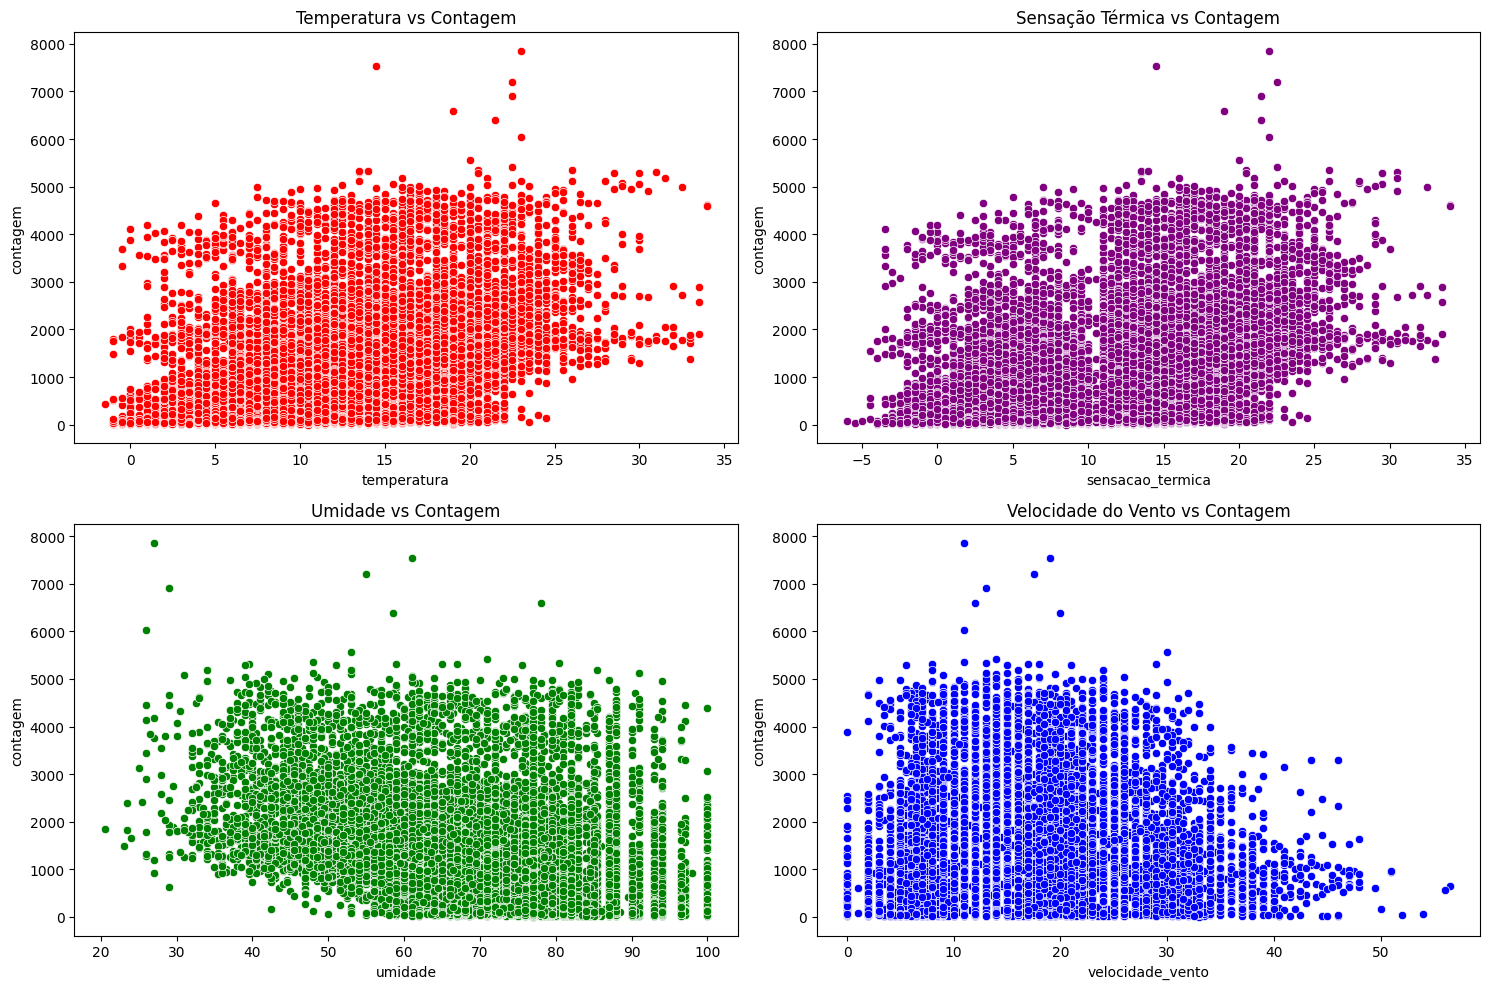

In [93]:
import matplotlib.pyplot as plt
# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Temperatura vs Contagem
sns.scatterplot(data=dados_limpo, x='temperatura', y='contagem', color = 'red' , ax=axes[0, 0])
axes[0, 0].set_title('Temperatura vs Contagem')

# Plot 2: Sensação Térmica vs Contagem
sns.scatterplot(data=dados_limpo, x='sensacao_termica', y='contagem', color = 'purple', ax=axes[0, 1])
axes[0, 1].set_title('Sensação Térmica vs Contagem')

# Plot 3: Umidade vs Contagem
sns.scatterplot(data=dados_limpo, x='umidade', y='contagem', color = 'green',ax=axes[1, 0])
axes[1, 0].set_title('Umidade vs Contagem')

# Plot 4: Velocidade do Vento vs Contagem
sns.scatterplot(data=dados_limpo, x='velocidade_vento', y='contagem', color = 'blue', ax=axes[1, 1])
axes[1, 1].set_title('Velocidade do Vento vs Contagem')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


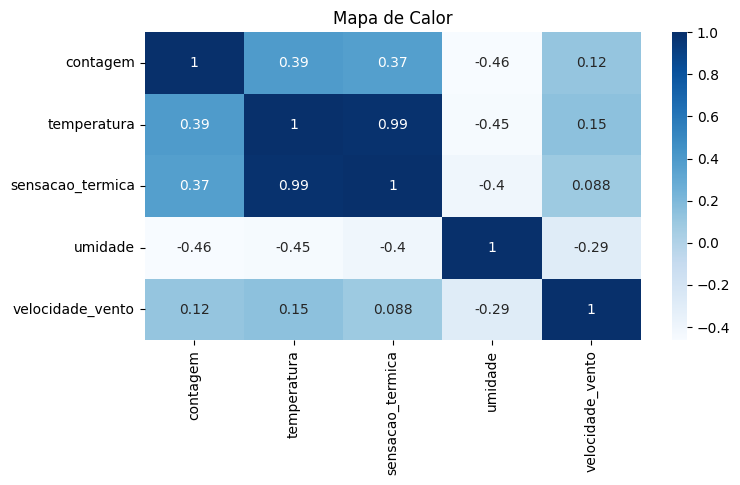

In [94]:
plt.figure(figsize=(8,4))

correlation_matrix = dados_limpo.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Mapa de Calor')
plt.show()


## Descritivo mais específico

In [95]:
dados_limpo.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2017-01-03 23:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [96]:
for col in ['clima','feriado','fim_de_semana','estacao']:
    print(f'Coluna:{col}')
    print(dados_limpo[col].unique())
    print(dados_limpo[col].value_counts())
    print('='*15,'\n')

Coluna:clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']
clima
Céu limpo               6150
Parcialmente nublado    5498
Nublado                 3551
Chuva leve              2141
Neve                      60
Chuva com trovoadas       14
Name: count, dtype: int64

Coluna:feriado
['Não' 'Sim']
feriado
Não    17030
Sim      384
Name: count, dtype: int64

Coluna:fim_de_semana
['Sim' 'Não']
fim_de_semana
Não    12444
Sim     4970
Name: count, dtype: int64

Coluna:estacao
['Inverno' 'Primavera' 'Verão' 'Outono']
estacao
Primavera    4394
Verão        4387
Inverno      4330
Outono       4303
Name: count, dtype: int64



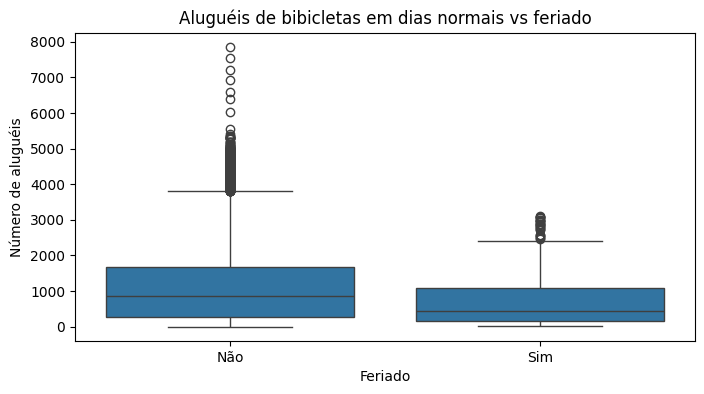

In [97]:
plt.figure(figsize=(8,4))
sns.boxplot(x='feriado',y='contagem',data=dados_limpo)
plt.title('Aluguéis de bibicletas em dias normais vs feriado')
plt.xlabel('Feriado')
plt.ylabel('Número de aluguéis')
plt.show()

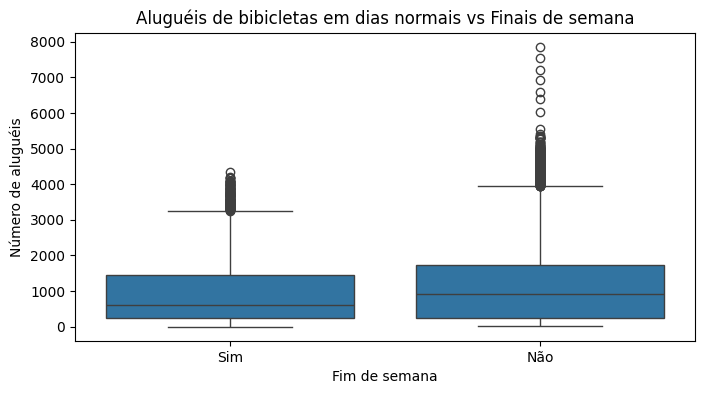

In [98]:
plt.figure(figsize=(8,4))
sns.boxplot(x='fim_de_semana',y='contagem',data=dados_limpo)
plt.title('Aluguéis de bibicletas em dias normais vs Finais de semana')
plt.xlabel('Fim de semana')
plt.ylabel('Número de aluguéis')
plt.show()

In [99]:
mediana_feriado = dados_limpo.groupby('feriado')['contagem'].median()
mediana_fim_de_semana = dados_limpo.groupby('fim_de_semana')['contagem'].median()


In [100]:
mediana_feriado

,contagem
feriado,
Não,855.0
Sim,439.5


In [101]:
mediana_fim_de_semana

,contagem
fim_de_semana,
Não,927.0
Sim,619.0


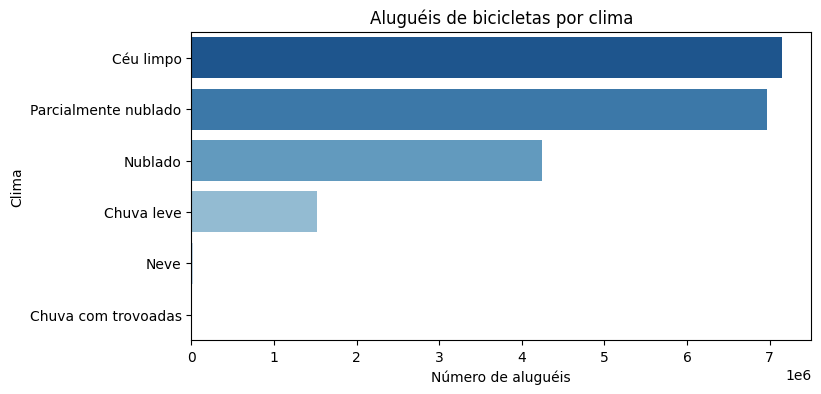

In [102]:
dados_clima = dados_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem',ascending=False)
plt.figure(figsize=(8,4))

sns.barplot(x='contagem', y='clima', hue='clima', palette='Blues_r', orient='h', data=dados_clima)
plt.title('Aluguéis de bicicletas por clima')
plt.xlabel('Número de aluguéis')
plt.ylabel('Clima')
plt.show()

In [103]:
dados_clima

,clima,contagem
2,Céu limpo,7146847
5,Parcialmente nublado,6965558
4,Nublado,4243887
1,Chuva leve,1526461
3,Neve,15051
0,Chuva com trovoadas,8168


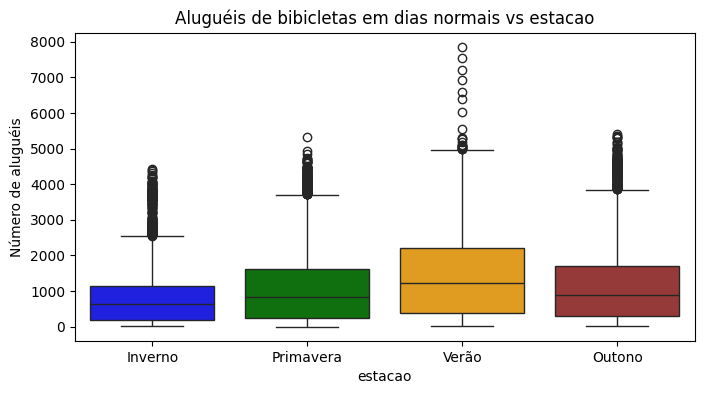

In [104]:
plt.figure(figsize=(8,4))

paleta_cores = {'Primavera':'green','Verão':'Orange','Outono' : 'brown', 'Inverno':'blue'}
sns.boxplot(x='estacao',y='contagem',hue='estacao', palette=paleta_cores, data=dados_limpo)
plt.title('Aluguéis de bibicletas em dias normais vs estacao')
plt.xlabel('estacao')
plt.ylabel('Número de aluguéis')
plt.show()

In [105]:
mediana_estacao = dados_limpo.groupby('estacao')['contagem'].median()
mediana_estacao


,contagem
estacao,
Inverno,632.0
Outono,898.0
Primavera,823.0
Verão,1214.0


In [106]:
from scipy.stats import mannwhitneyu

In [107]:
primavera = dados_limpo[dados_limpo['estacao'] == 'Primavera']['contagem']

In [108]:
outono = dados_limpo[dados_limpo['estacao'] == 'Outono']['contagem']

In [109]:
u_statistic, p_value = mannwhitneyu(primavera, outono, alternative='two-sided')
u_statistic, p_value

(np.float64(9044682.5), np.float64(0.0004762100221646296))

In [110]:
dados_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [111]:
dados_data = dados_limpo.copy()
dados_data['data_hora'] = pd.to_datetime(dados_data['data_hora'])
dados_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.5+ MB


In [112]:
dados_data['data_hora'] = dados_data['data_hora'].dt.date
dados_data

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03,1042,5.00,1.00,81.0,19.0,Nublado,Não,Não,Inverno
17410,2017-01-03,541,5.00,1.00,81.0,21.0,Parcialmente nublado,Não,Não,Inverno
17411,2017-01-03,337,5.50,1.50,78.5,24.0,Parcialmente nublado,Não,Não,Inverno
17412,2017-01-03,224,5.50,1.50,76.0,23.0,Parcialmente nublado,Não,Não,Inverno


In [113]:
dados_data = dados_data.rename(columns={'data_hora':'data'})
dados_data.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [114]:
dados_data['data'] = pd.to_datetime(dados_data['data'])
dados_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 2.0+ MB


In [115]:
dados_data = dados_limpo.copy()
dados_data['data_hora'] = pd.to_datetime(dados_data['data_hora'])
dados_data['horario'] = dados_data['data_hora'].dt.hour
dados_por_hora = dados_data.groupby('horario')['contagem'].sum().reset_index()
dados_por_hora

,horario,contagem
0,0,210401
1,1,145257
2,2,98275
3,3,67951
4,4,52859
5,5,79820
6,6,338771
7,7,1066309
8,8,2087164
9,9,1201745


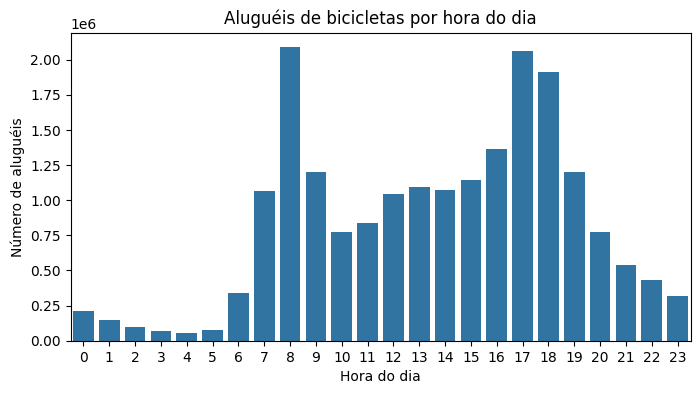

In [116]:
plt.figure(figsize=(8,4))
sns.barplot(x='horario',y='contagem',data=dados_por_hora)
plt.title('Aluguéis de bicicletas por hora do dia')
plt.xlabel('Hora do dia')
plt.ylabel('Número de aluguéis')
plt.show()

Text(0, 0.5, 'Número de aluguéis')

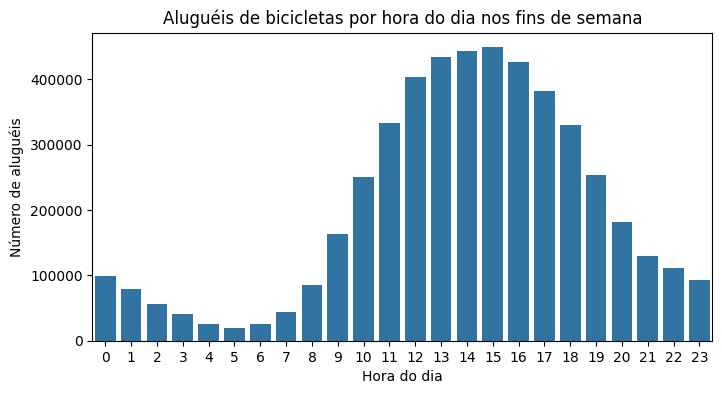

In [117]:
dados_fim_de_semana = dados_data[dados_data['fim_de_semana'] == 'Sim']
alugueis_fim_de_semana = dados_fim_de_semana.groupby('horario')['contagem'].sum().reset_index()


plt.figure(figsize=(8,4))
sns.barplot(x='horario',y='contagem',data=alugueis_fim_de_semana)
plt.title('Aluguéis de bicicletas por hora do dia nos fins de semana')
plt.xlabel('Hora do dia')
plt.ylabel('Número de aluguéis')

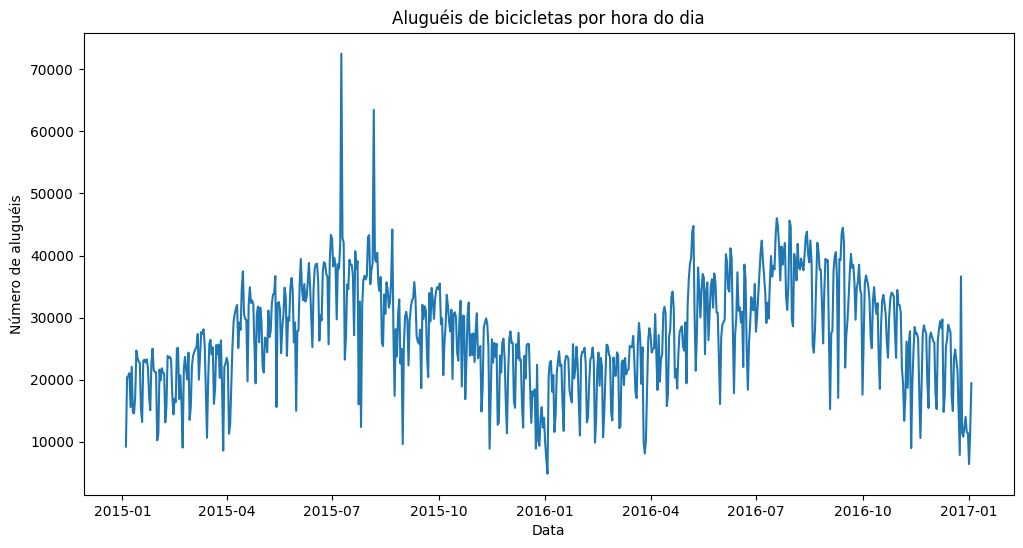

In [118]:
dados_data = dados_limpo.copy()
dados_data['data_hora'] = pd.to_datetime(dados_data['data_hora'])

dados_data['horario'] = dados_data['data_hora'].dt.hour

dados_data['data'] = dados_data['data_hora'].dt.date
dados_por_hora = dados_data.groupby('data')['contagem'].sum().reset_index()


plt.figure(figsize=(12,6))
sns.lineplot(data=dados_por_hora, x='data',y='contagem')
plt.title('Aluguéis de bicicletas por hora do dia')
plt.xlabel('Data')
plt.ylabel('Número de aluguéis')
plt.show()

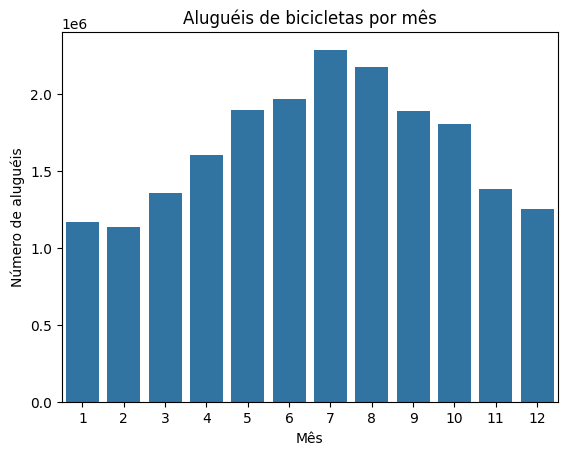

In [119]:

dados_data['mes'] = dados_data['data_hora'].dt.month
alugueis_mensais = dados_data.groupby('mes')['contagem'].sum().reset_index()
sns.barplot(x='mes', y='contagem', data=alugueis_mensais)
plt.title('Aluguéis de bicicletas por mês')
plt.xlabel('Mês')
plt.ylabel('Número de aluguéis')
plt.show()

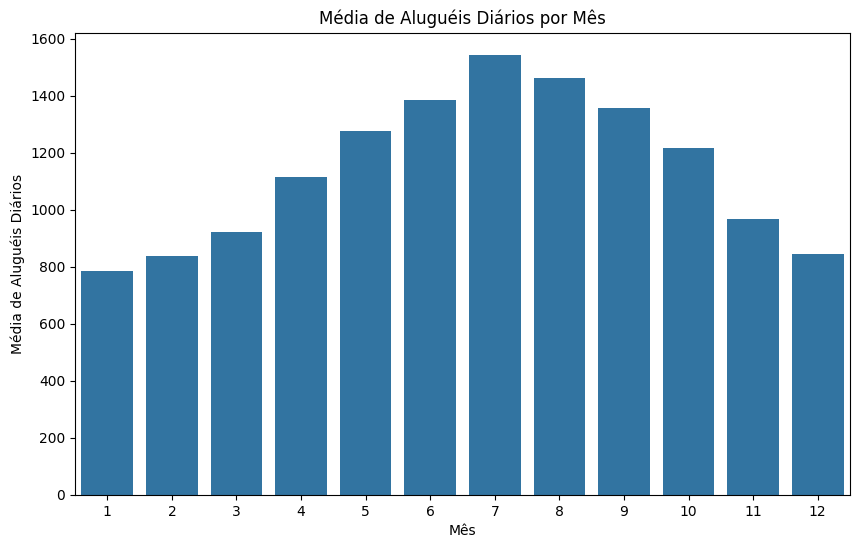

In [120]:


media_alugueis_diarios = dados_data.groupby('mes')['contagem'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='mes', y='contagem', data=media_alugueis_diarios)
plt.title('Média de Aluguéis Diários por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Aluguéis Diários')
plt.show()


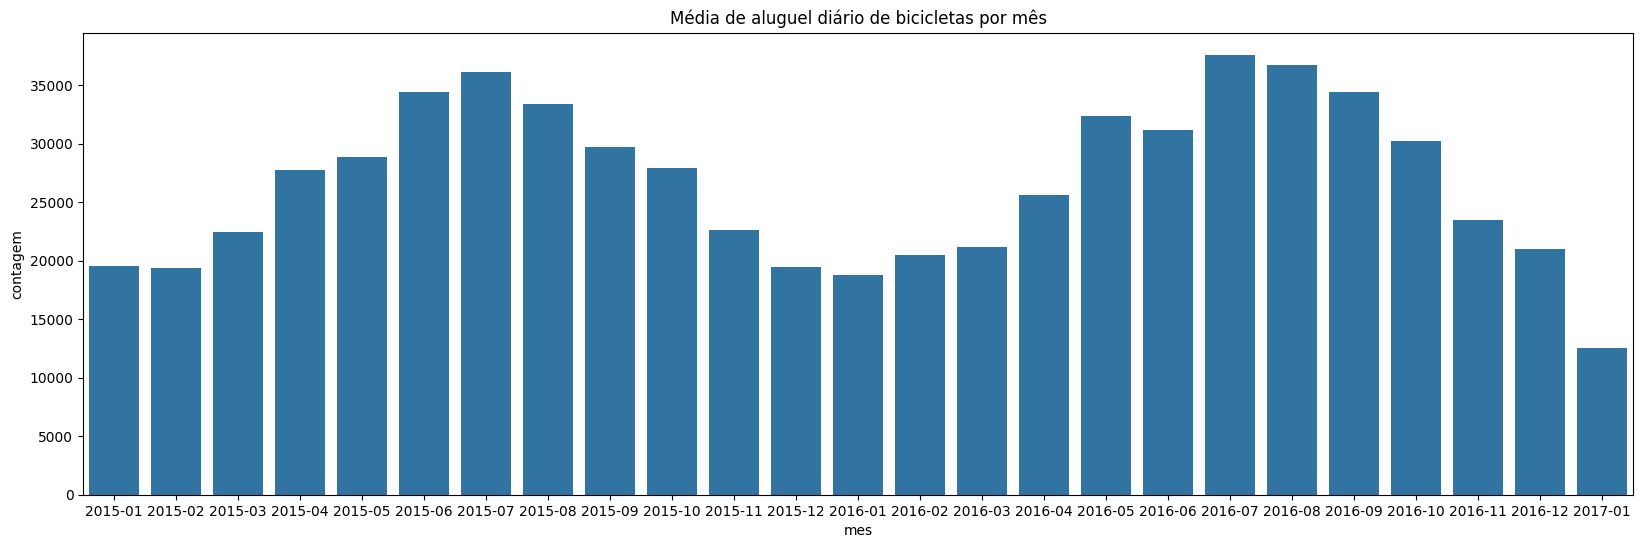

In [121]:
dados_tempo = dados_data.groupby('data')['contagem'].sum().reset_index()
dados_tempo['data'] = pd.to_datetime(dados_tempo['data'])
dados_tempo['mes'] = dados_tempo['data'].dt.to_period('M')
media_aluguel_mes = dados_tempo.groupby(['mes'])['contagem'].mean().reset_index()

plt.figure(figsize = (20,6))
sns.barplot(x='mes', y='contagem', data=media_aluguel_mes)
plt.title('Média de aluguel diário de bicicletas por mês')
plt.show()

## 1.5 Começar as Previsões

In [122]:
from prophet import Prophet

In [123]:
dados_prophet = dados_data[['data','contagem']].rename(columns = { 'data': 'ds', 'contagem': 'y'})
dados_prophet.head()

,ds,y
0,2015-01-04,182
1,2015-01-04,138
2,2015-01-04,134
3,2015-01-04,72
4,2015-01-04,47


In [124]:
dados_prophet = dados_prophet.groupby('ds')['y'].sum().reset_index()
dados_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [125]:
import numpy as np
np.random.seed(4587)

modelo = Prophet()
modelo.fit(dados_prophet)

futuro = modelo.make_future_dataframe(periods=90, freq='D')
previsoes = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz26620y5/rxr8m8eh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz26620y5/0lz8gdt0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43767', 'data', 'file=/tmp/tmpz26620y5/rxr8m8eh.json', 'init=/tmp/tmpz26620y5/0lz8gdt0.json', 'output', 'file=/tmp/tmpz26620y5/prophet_modeltrs6z3_y/prophet_model-20250816015915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:59:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:59:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


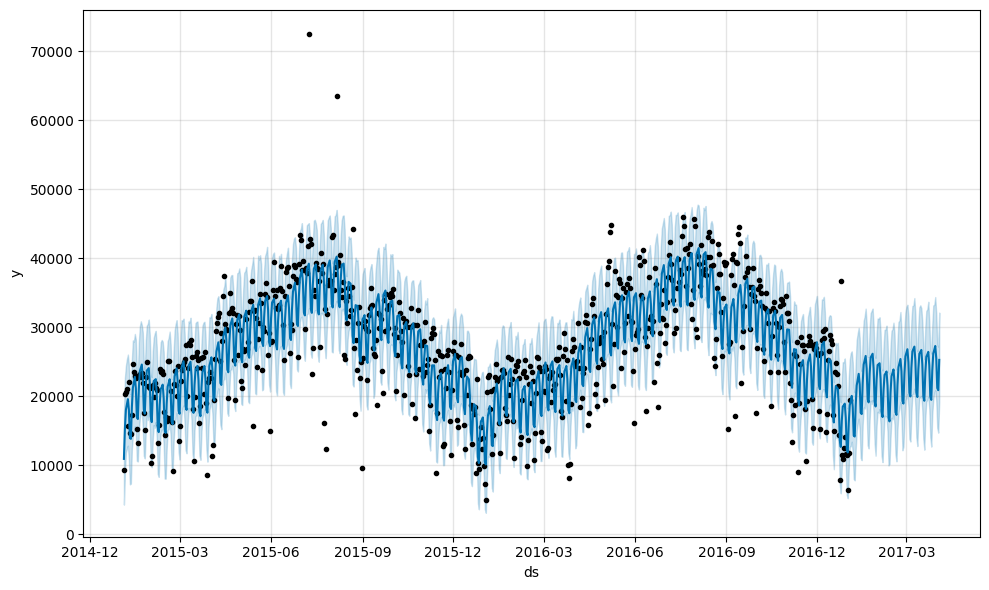

In [126]:
fig1 = modelo.plot(previsoes)

In [127]:
previsoes[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,10901.148240,4272.992256,17164.501687
1,2015-01-05,15311.232708,8913.287413,22636.582586
2,2015-01-06,18014.350866,11829.942639,24414.201504
3,2015-01-07,18744.719144,12344.154062,25364.884607
4,2015-01-08,19556.191727,12809.812197,26023.639264
...,...,...,...,...
815,2017-03-30,27262.740955,20840.917738,34360.842038
816,2017-03-31,25490.750990,19305.507172,31997.954460
817,2017-04-01,21173.750109,15400.577315,27665.232260
818,2017-04-02,20856.740496,14700.917577,27176.730648


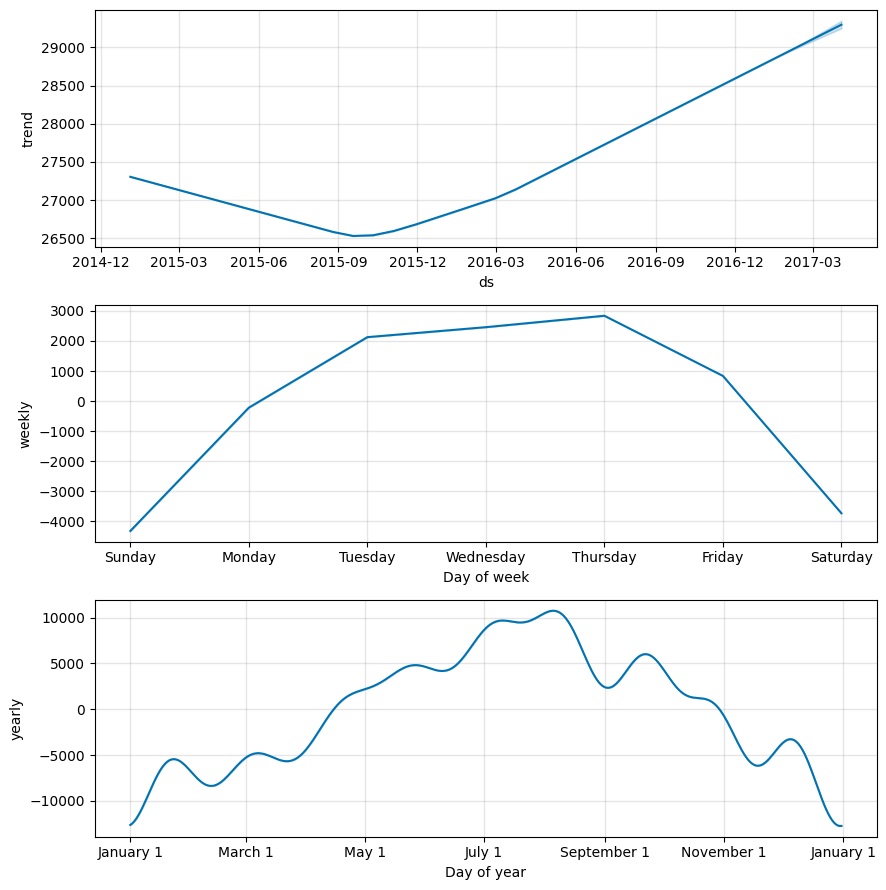

In [128]:
fig2 = modelo.plot_components(previsoes)

In [129]:
dados_treino = pd.DataFrame

In [130]:

dados_treino = pd.DataFrame()


dados_treino['ds'] = dados_prophet['ds'][:584]
dados_treino['y'] = dados_prophet['y'][:584]

In [131]:
dados_teste = pd.DataFrame()
dados_teste['ds'] = dados_prophet['ds'][584:]
dados_teste['y'] = dados_prophet['y'][584:]

In [132]:
import numpy as np
np.random.seed(4587)

modelo = Prophet()
modelo.fit(dados_treino)
futuro = modelo.make_future_dataframe(periods=90, freq='D')
previsoes = modelo.predict(futuro)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz26620y5/xse2t_uu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz26620y5/io9m74se.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2160', 'data', 'file=/tmp/tmpz26620y5/xse2t_uu.json', 'init=/tmp/tmpz26620y5/io9m74se.json', 'output', 'file=/tmp/tmpz26620y5/prophet_modelu1nktngj/prophet_model-20250816015917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:59:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:59:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


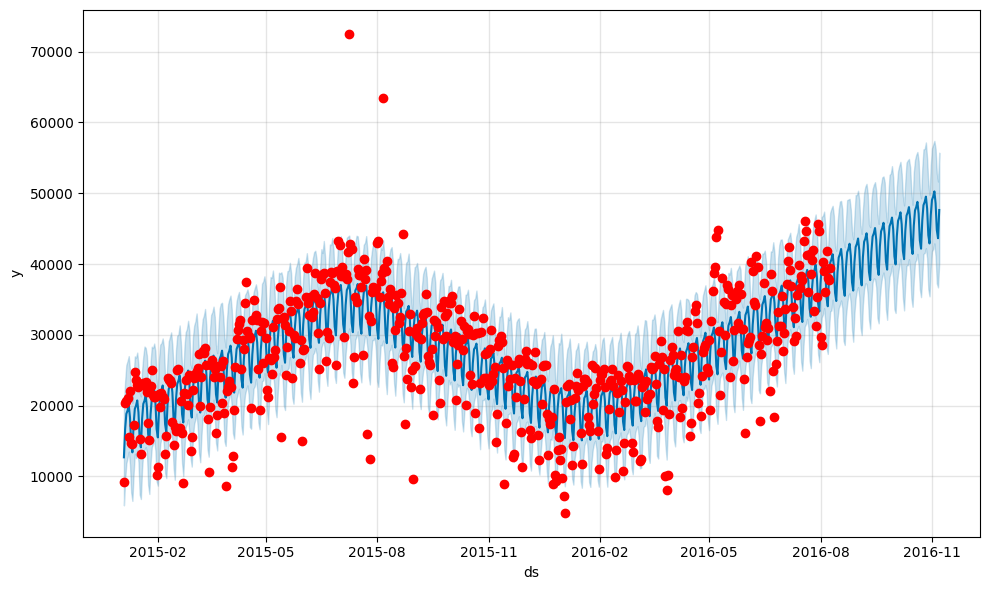

In [133]:
fig1 = modelo.plot(previsoes)
plt.plot(dados_treino['ds'], dados_treino['y'], 'ro')

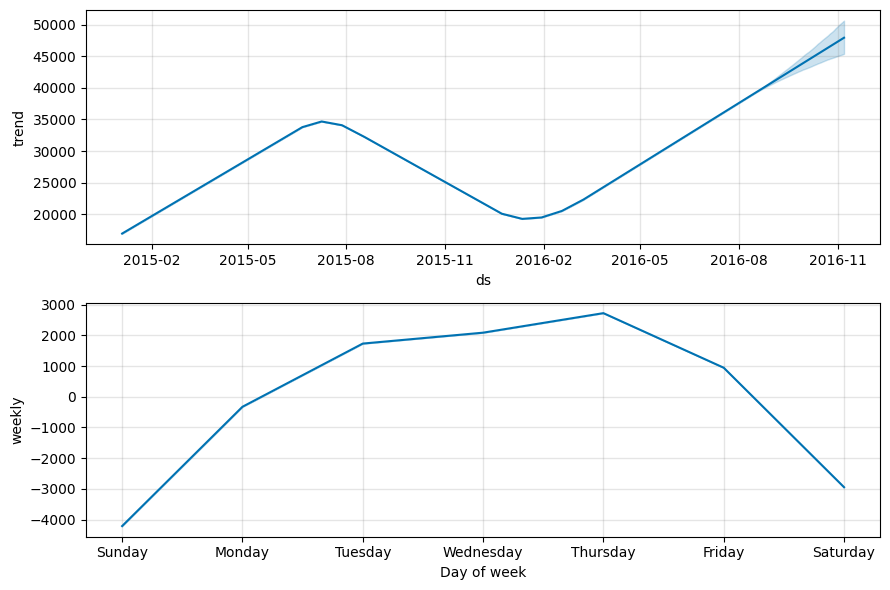

In [134]:
fig2  = modelo.plot_components(previsoes)

In [135]:
dados_previsao = previsoes[['ds','yhat']]


dados_teste['ds'] = pd.to_datetime(dados_teste['ds'])

dados_comparacao = dados_teste.merge(dados_previsao, on='ds')
dados_comparacao.head()


,ds,y,yhat
0,2016-08-10,38430,40646.666399
1,2016-08-11,37626,41387.553580
2,2016-08-12,40159,39717.735888
3,2016-08-13,43041,35936.820545
4,2016-08-14,43848,34777.785741


In [136]:
from sklearn.metrics import mean_squared_error

In [137]:
mse = mean_squared_error(dados_comparacao['y'], dados_comparacao['yhat'])
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 173995143.74643818
RMSE: 13190.721881172318


In [138]:
np.random.seed(4587)

modelo = Prophet(yearly_seasonality=True)
modelo.fit(dados_treino)
futuro = modelo.make_future_dataframe(periods=90, freq='D')
previsoes = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz26620y5/v__xnvv2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz26620y5/w_4jg5xs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16090', 'data', 'file=/tmp/tmpz26620y5/v__xnvv2.json', 'init=/tmp/tmpz26620y5/w_4jg5xs.json', 'output', 'file=/tmp/tmpz26620y5/prophet_model7dx05qrc/prophet_model-20250816015918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:59:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:59:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


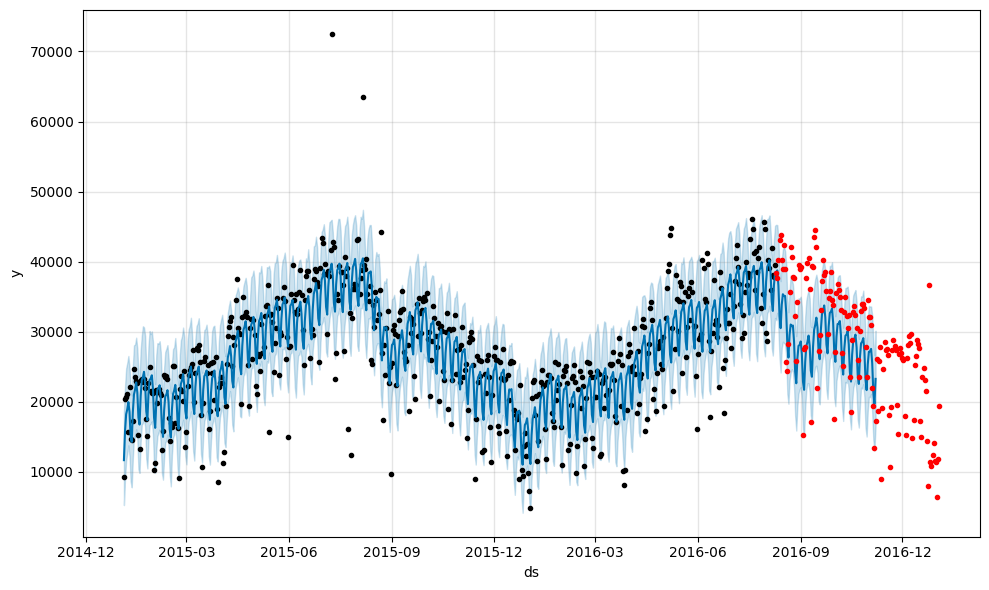

In [139]:
fig1 = modelo.plot(previsoes)
plt.plot(dados_teste['ds'], dados_teste['y'], '.r')

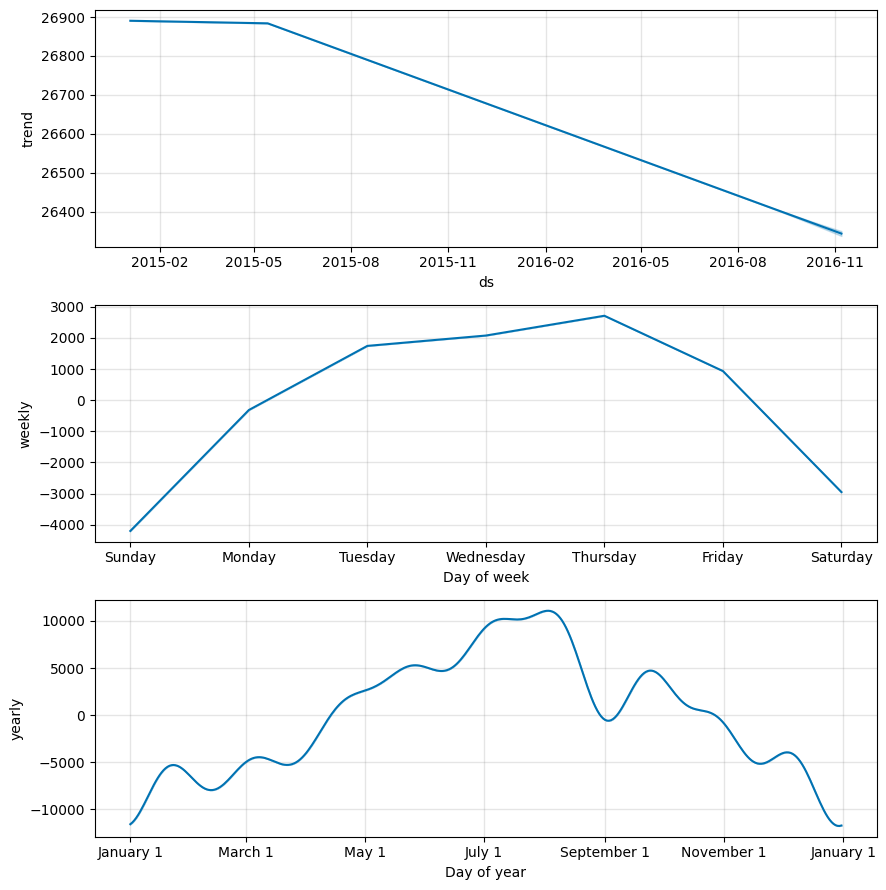

In [140]:
fig2 = modelo.plot_components(previsoes)

In [141]:
dados_previsao = previsoes[['ds','yhat']]
dados_comparacao = dados_teste.merge(dados_previsao, on='ds')
dados_comparacao.head()

,ds,y,yhat
0,2016-08-10,38430,38465.369605
1,2016-08-11,37626,38747.157010
2,2016-08-12,40159,36570.384861
3,2016-08-13,43041,32236.934232
4,2016-08-14,43848,30495.324496


In [142]:
mse = mean_squared_error(dados_comparacao['y'], dados_comparacao['yhat'])
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 44169099.6118393
RMSE: 6645.983720401315


In [143]:
np.random.seed(4587)

modelo = Prophet()

modelo.fit(dados_prophet)
futuro = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz26620y5/lyi8jdql.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz26620y5/5z47tx4z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17415', 'data', 'file=/tmp/tmpz26620y5/lyi8jdql.json', 'init=/tmp/tmpz26620y5/5z47tx4z.json', 'output', 'file=/tmp/tmpz26620y5/prophet_modelkngu5g__/prophet_model-20250816015919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:59:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:59:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [144]:
sem_outliers = dados_prophet[(dados_prophet[ 'y']>previsao['yhat_lower']) & (dados_prophet['y']< previsao['yhat_upper'])]

In [145]:
sem_outliers

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [146]:
dados_treino = pd.DataFrame()
split_index = int(len(sem_outliers) * 0.8)
dados_treino['ds'] = sem_outliers['ds'][:split_index]
dados_treino['y'] = sem_outliers['y'][:split_index]

In [147]:
dados_teste = pd.DataFrame()
split_index = int(len(sem_outliers) * 0.8)
dados_teste['ds'] = sem_outliers['ds'][split_index:]
dados_teste['y'] = sem_outliers['y'][split_index:]

In [148]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(dados_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=365, freq='D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz26620y5/vpg2_3x5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz26620y5/ydsrn044.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95465', 'data', 'file=/tmp/tmpz26620y5/vpg2_3x5.json', 'init=/tmp/tmpz26620y5/ydsrn044.json', 'output', 'file=/tmp/tmpz26620y5/prophet_modeltw_74e8g/prophet_model-20250816015920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:59:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:59:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [149]:
from prophet.plot import plot_plotly

In [150]:
fig = plot_plotly(modelo_sem_outliers, previsao)
fig.show()

In [151]:
previsao.to_csv('dados_completos_dev.csv', index=False, sep = ';')